In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup=pd.read_csv("C:/Users/ajink/Downloads/50_Startups.csv")

In [3]:
startup.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.shape

(50, 5)

In [5]:
startup1=startup.drop(['State'],inplace=True,axis=1)

In [6]:
startup.head()

,RD_spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
startup.isnull().sum()

RD_spend           0
Administration     0
Marketing_spend    0
Profit             0
dtype: int64

In [9]:
startup.corr()

,RD_spend,Administration,Marketing_spend,Profit
RD_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_spend+Administration+Marketing_spend',data=startup).fit()

In [11]:
model.params

Intercept          50122.192990
RD_spend               0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RD_spend           17.846374
Administration     -0.525507
Marketing_spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_spend           2.634968e-22
Administration     6.017551e-01
Marketing_spend    1.047168e-01
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [21]:
ml_a=smf.ols('Profit~Administration',data=startup).fit()

In [22]:
print(ml_a.tvalues,'\n',ml_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [23]:
rsq_rd = smf.ols('RD_spend~Administration+Marketing_spend',data=startup).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_mark = smf.ols('Marketing_spend~RD_spend+Administration',data=startup).fit().rsquared  
vif_mark = 1/(1-rsq_mark) 

rsq_adm = smf.ols('Administration~RD_spend+Marketing_spend',data=startup).fit().rsquared  
vif_adm = 1/(1-rsq_adm)


In [24]:
d1 = {'Variables':['RD_spend','Administration','Marketing_spend'],'VIF':[vif_rd,vif_adm,vif_mark]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_spend,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


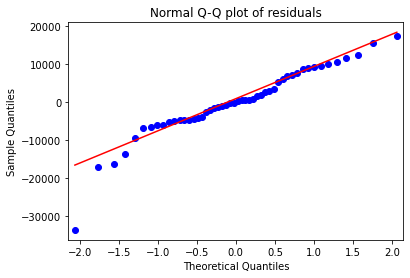

In [25]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

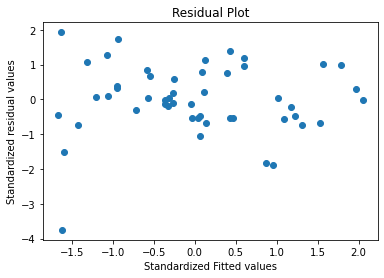

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

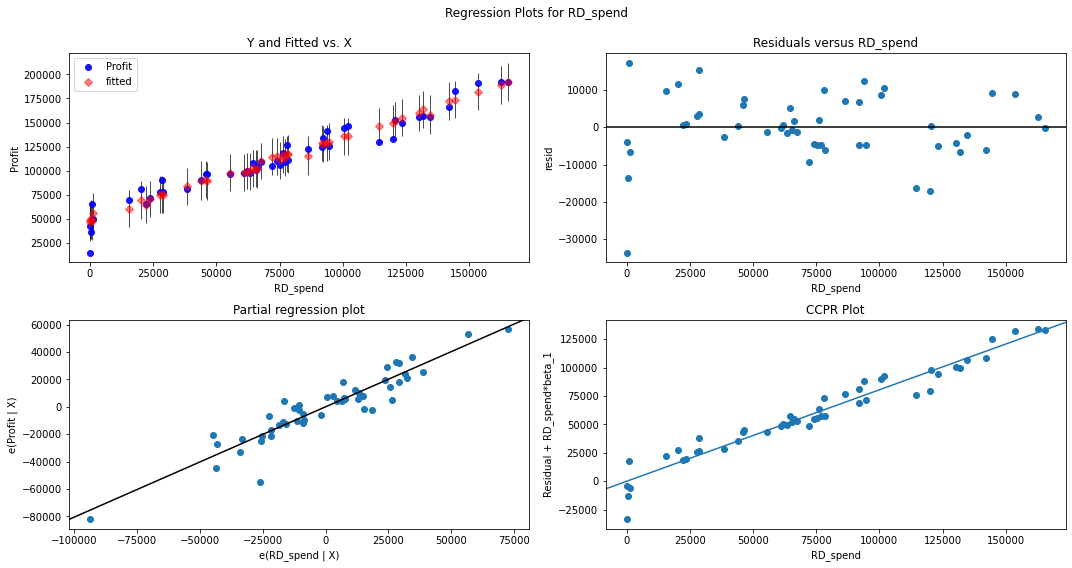

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_spend", fig=fig)
plt.show()

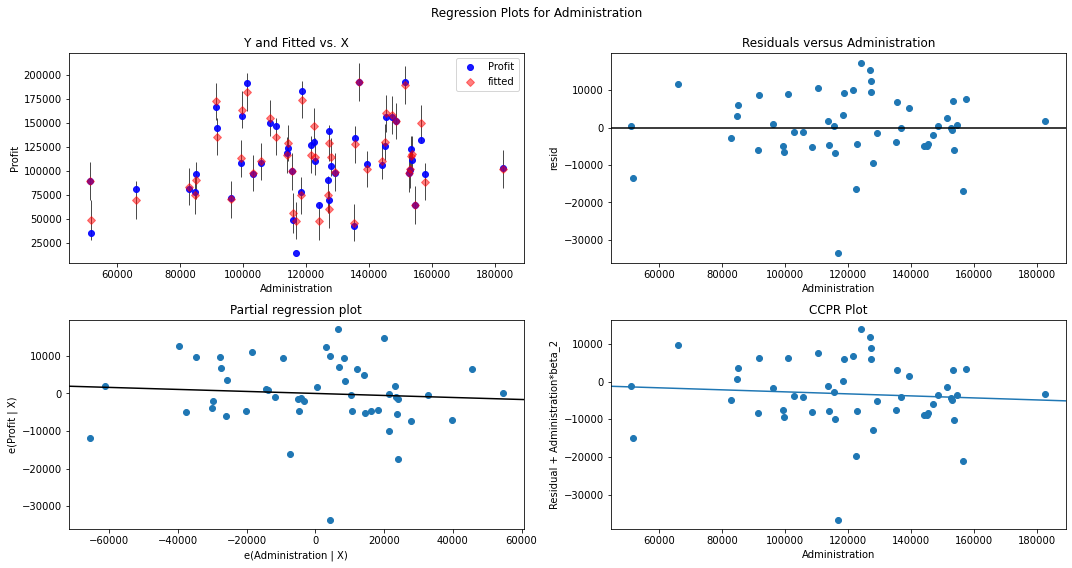

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

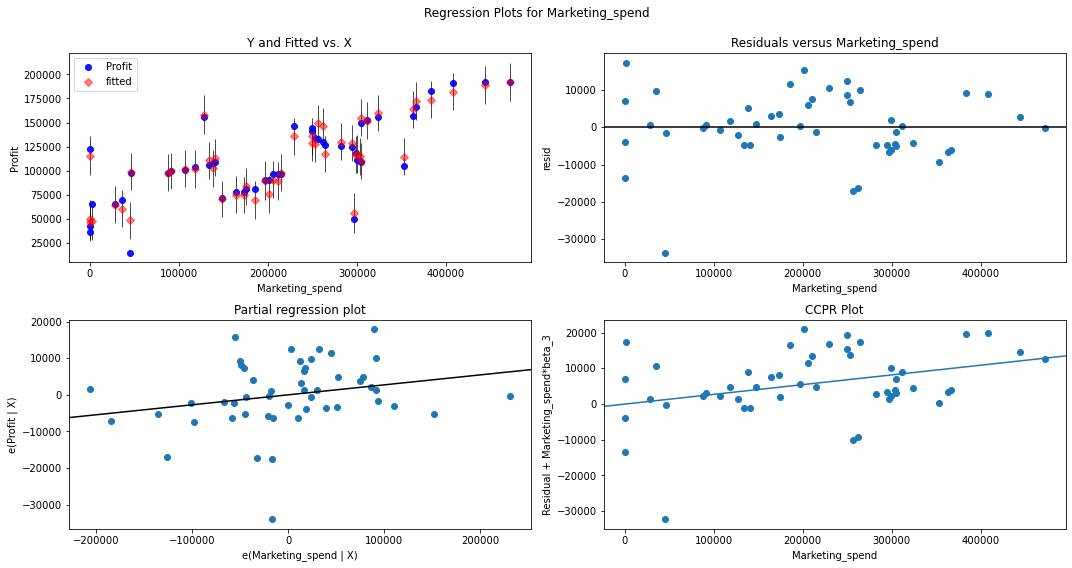

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_spend", fig=fig)
plt.show()

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

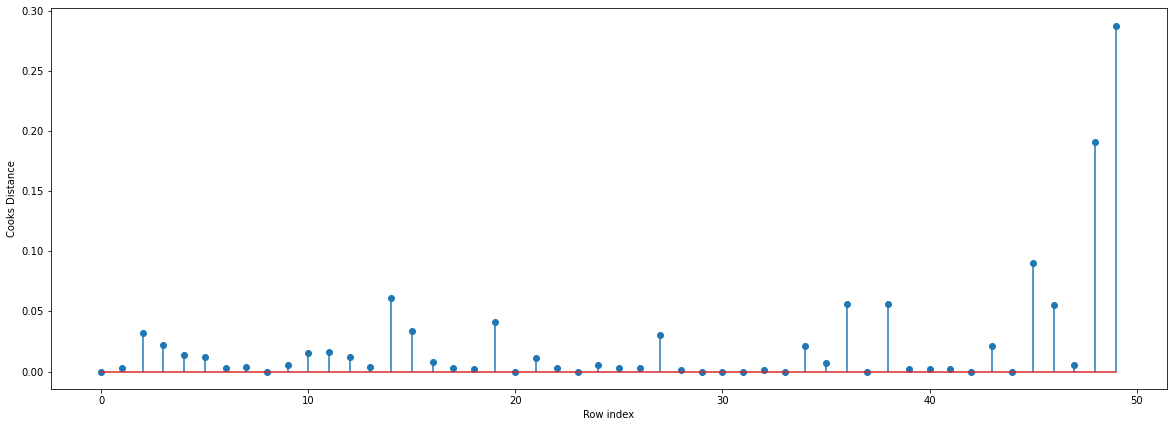

In [33]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

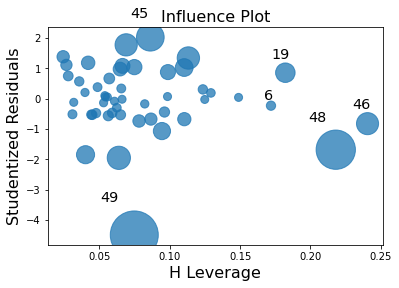

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [36]:
startup[startup.index.isin([48, 49])]

,RD_spend,Administration,Marketing_spend,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [37]:
startup.head()

,RD_spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [38]:
startup_new=pd.read_csv("C:/Users/Win/Desktop/data science assignments/multiple linear regression/50_Startups.csv")

In [42]:
startup1=startup_new.drop(startup_new.index[[48,49]],axis=0).reset_index()

In [43]:
startup1=startup1.drop(['index'],axis=1)

In [44]:
startup1.drop(['State'],axis=1,inplace=True)

In [45]:
final_ml_V = smf.ols('Profit~RD_spend+Marketing_spend',data=startup1).fit()

In [46]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9609119875752479, 994.886442942941)

In [47]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

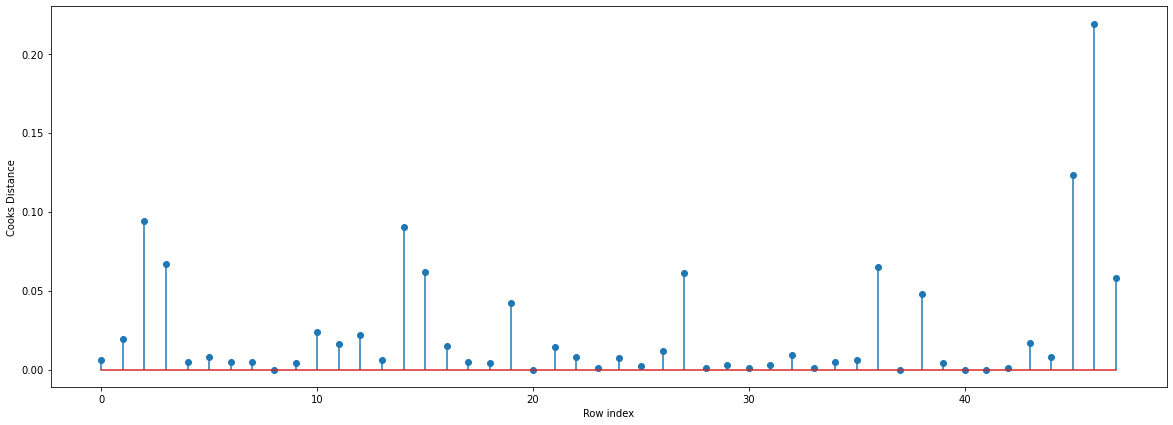

In [50]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [51]:
(np.argmax(c_V),np.max(c_V))

(46, 0.2187017512375176)

In [52]:
#### Since the value is <0.5 , we can stop the diagnostic process and finalize the model


In [53]:
final_ml_V = smf.ols('Profit~RD_spend+Marketing_spend',data=startup1).fit()

In [54]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9609119875752479, 994.886442942941)

In [56]:
#Predicting for new data


In [57]:
new_data=pd.DataFrame({'RD_spend':165349,"Administation":151378,"Marketing_spend":443899},index=[1])

In [58]:
final_ml_V.predict(new_data)

1    189212.246752
dtype: float64

In [59]:
final_ml_V.predict(startup_new.iloc[0:5,])

0    189885.740778
1    187095.246496
2    179181.591670
3    171606.096081
4    169451.985498
dtype: float64

In [61]:
pred_y = final_ml_V.predict(startup_new)

In [62]:
pred_y

0     189885.740778
1     187095.246496
2     179181.591670
3     171606.096081
4     169451.985498
5     161500.313852
6     157929.476340
7     159344.167484
8     151541.585916
9     153530.033848
10    135216.183117
11    134758.234001
12    129521.945343
13    128150.253596
14    149749.963756
15    145706.920129
16    117675.954567
17    130922.882285
18    128983.420883
19    117761.257387
20    117150.983892
21    118820.135210
22    115524.963571
23    110587.752231
24    113941.581902
25    104353.248043
26    112464.314154
27    115277.118261
28    104941.871740
29    104332.812499
30    101167.803455
31    100437.197751
32    101168.375422
33     99148.202614
34     92078.263418
35     91633.714754
36     78177.525204
37     89932.884669
38     71304.837486
39     85160.144690
40     77563.103445
41     76699.268770
42     73029.882710
43     64054.516093
44     69014.452144
45     52081.185452
46     59452.173426
47     51265.583966
48     51682.664560
49     52356.375620
